Importing the necessary libraries 

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#Load the dataset
data = pd.read_csv('/Users/aakashvenkatraman/Downloads/Major Project - Internzvaller/heart-disease (1).csv')
print('Shape of the data is:',data.shape)

Shape of the data is: (303, 14)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' %x )
data.describe().transpose

<bound method DataFrame.transpose of           age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count 303.000 303.000 303.000   303.000 303.000 303.000  303.000  303.000   
mean   54.366   0.683   0.967   131.624 246.264   0.149    0.528  149.647   
std     9.082   0.466   1.032    17.538  51.831   0.356    0.526   22.905   
min    29.000   0.000   0.000    94.000 126.000   0.000    0.000   71.000   
25%    47.500   0.000   0.000   120.000 211.000   0.000    0.000  133.500   
50%    55.000   1.000   1.000   130.000 240.000   0.000    1.000  153.000   
75%    61.000   1.000   2.000   140.000 274.500   0.000    1.000  166.000   
max    77.000   1.000   3.000   200.000 564.000   1.000    2.000  202.000   

        exang  oldpeak   slope      ca    thal  target  
count 303.000  303.000 303.000 303.000 303.000 303.000  
mean    0.327    1.040   1.399   0.729   2.314   0.545  
std     0.470    1.161   0.616   1.023   0.612   0.499  
min     0.000    0.000   0.000   0.000   

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [17]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [18]:
print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Data Filtering

In [19]:
data = data.drop(['slope', 'ca'], axis=1)
data.shape
data.isnull

<bound method DataFrame.isnull of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0    2.300   
1     37    1   2       130   250    0        1      187      0    3.500   
2     41    0   1       130   204    0        0      172      0    1.400   
3     56    1   1       120   236    0        1      178      0    0.800   
4     57    0   0       120   354    0        1      163      1    0.600   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1    0.200   
299   45    1   3       110   264    0        1      132      0    1.200   
300   68    1   0       144   193    1        1      141      0    3.400   
301   57    1   0       130   131    0        1      115      1    1.200   
302   57    0   1       130   236    0        0      174      0    0.000   

     thal  target  
0       1       1  
1       2    

Conduct exploratory data analysis.(EDA)

Check for any duplications 

In [20]:
data.duplicated().sum()

1

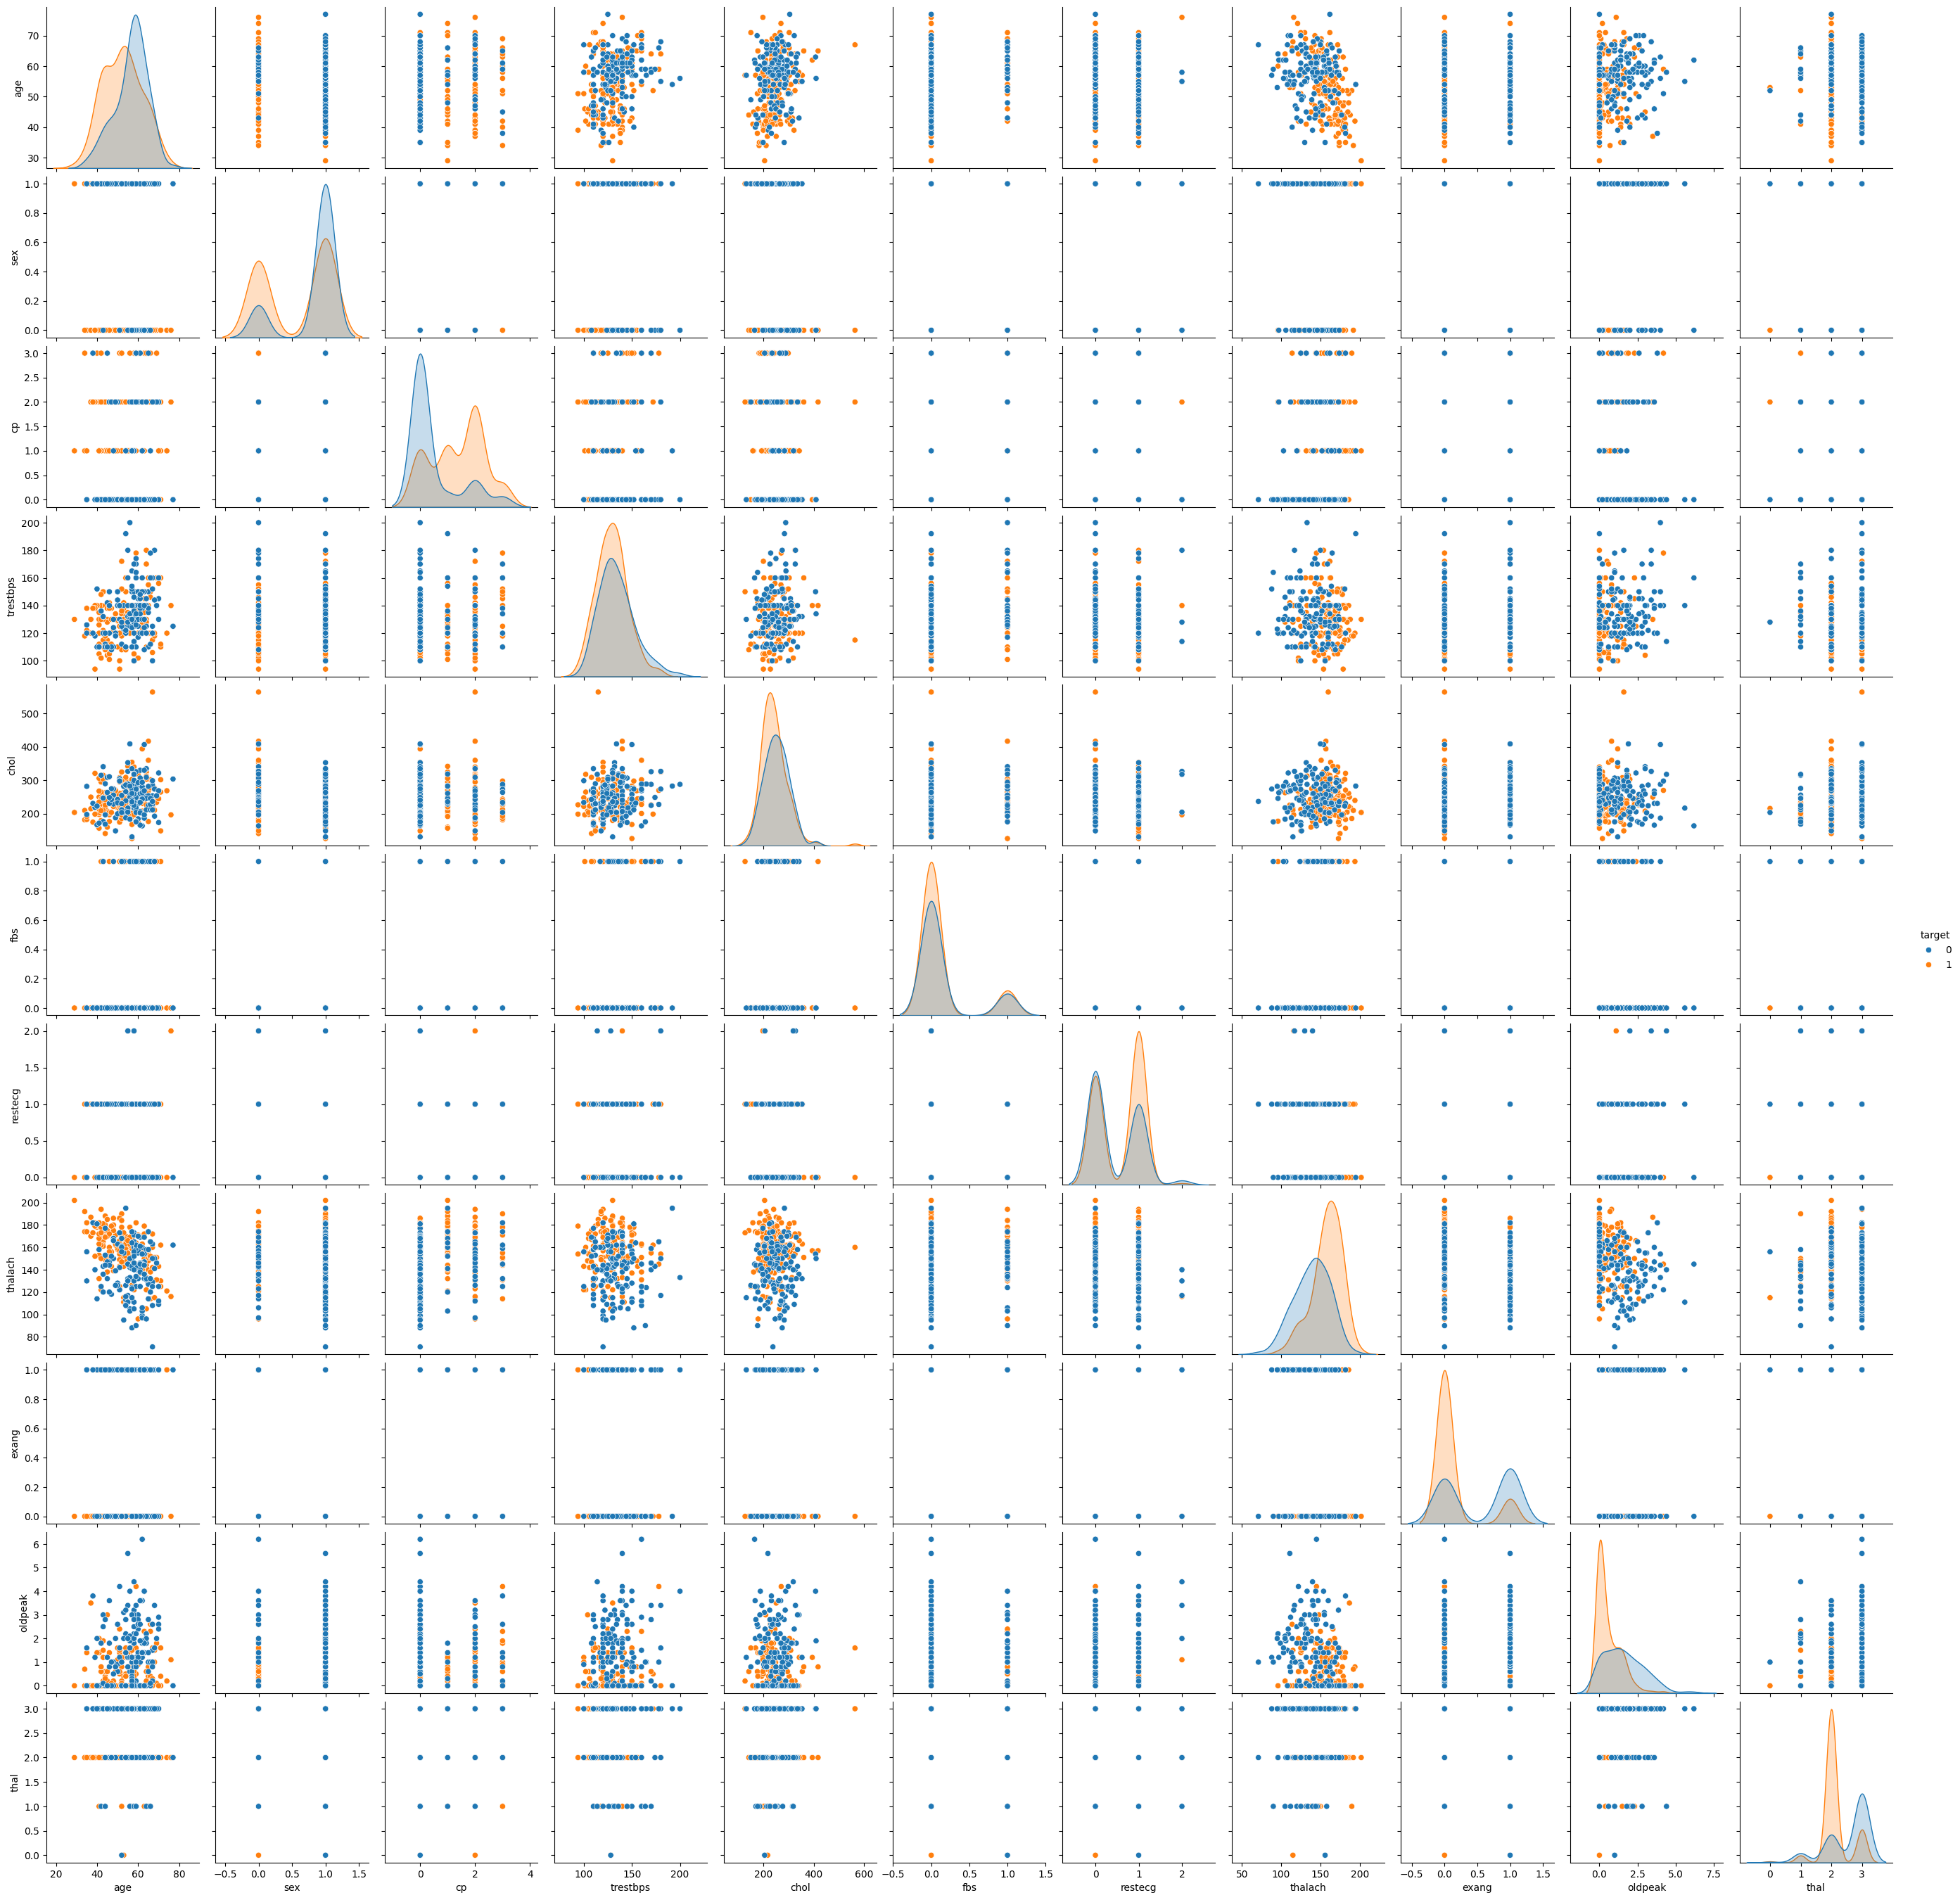

In [21]:
# Visualize data distribution
sns.pairplot(data, hue='target')
plt.show()


Perform feature engineering

In [22]:
# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)

# Feature and target selection
X = data.drop('target', axis=1)
y = data['target']


/var/folders/dz/7ghk5qkx0216kpwh10cg46g40000gn/T/ipykernel_59797/1023397769.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Build random-forrest classifier models

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Default parameters
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)

# Predictions and evaluation
y_pred_default = rf_default.predict(X_test)
print("Confusion Matrix (Default Parameters):")
print(confusion_matrix(y_test, y_pred_default))
print("Classification Report (Default Parameters):")
print(classification_report(y_test, y_pred_default))

# Tuned parameters
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_tuned.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tuned = rf_tuned.predict(X_test)
print("Confusion Matrix (Tuned Parameters):")
print(confusion_matrix(y_test, y_pred_tuned))
print("Classification Report (Tuned Parameters):")
print(classification_report(y_test, y_pred_tuned))


Confusion Matrix (Default Parameters):
[[34  7]
 [ 9 41]]
Classification Report (Default Parameters):
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Confusion Matrix (Tuned Parameters):
[[35  6]
 [ 9 41]]
Classification Report (Tuned Parameters):
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



Visualise important features.

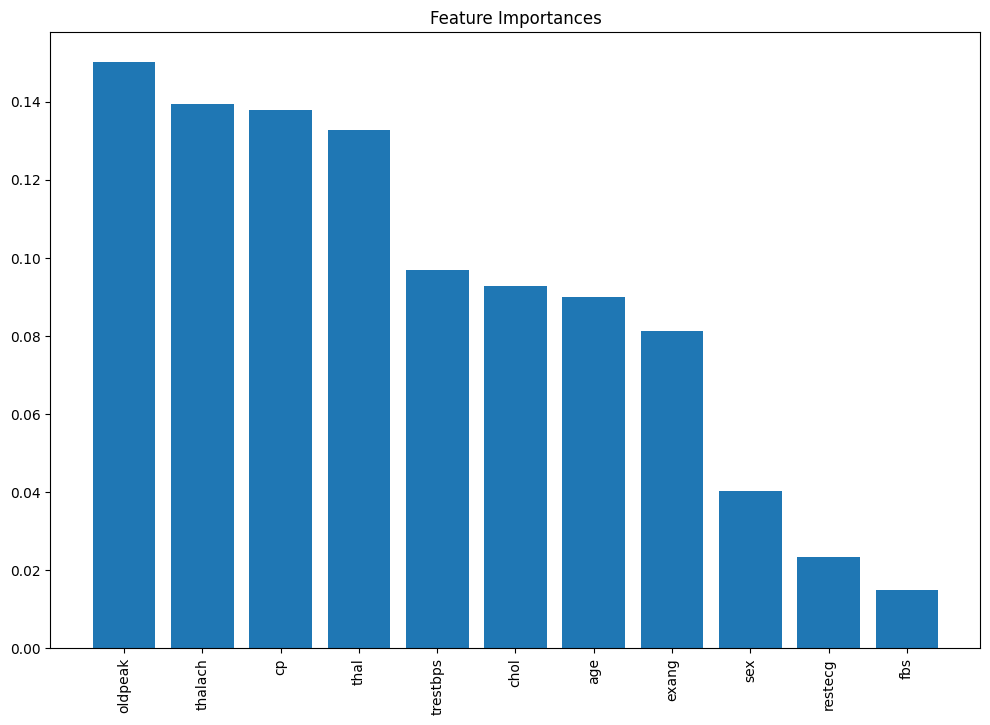

In [24]:
# Feature importance
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


Performance Comparison.

In [25]:
# Predictions and evaluation for default parameters
y_pred_default = rf_default.predict(X_test)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
class_report_default = classification_report(y_test, y_pred_default)

# Predictions and evaluation for tuned parameters
y_pred_tuned = rf_tuned.predict(X_test)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

# Print evaluation results
print("Confusion Matrix (Default Parameters):")
print(conf_matrix_default)
print("\nClassification Report (Default Parameters):")
print(class_report_default)

print("\nConfusion Matrix (Tuned Parameters):")
print(conf_matrix_tuned)
print("\nClassification Report (Tuned Parameters):")
print(class_report_tuned)


Confusion Matrix (Default Parameters):
[[34  7]
 [ 9 41]]

Classification Report (Default Parameters):
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Confusion Matrix (Tuned Parameters):
[[35  6]
 [ 9 41]]

Classification Report (Tuned Parameters):
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.87      0.82      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [26]:
# Feature importance
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature Ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances[indices[f]]})")




Feature Ranking:
1. Feature oldpeak (0.15031823697520658)
2. Feature thalach (0.1393815228221421)
3. Feature cp (0.137928557758453)
4. Feature thal (0.13270297084573898)
5. Feature trestbps (0.09684530677876714)
6. Feature chol (0.09285318873676332)
7. Feature age (0.08993403154775281)
8. Feature exang (0.0813720477515122)
9. Feature sex (0.0403761229632634)
10. Feature restecg (0.023379125940016992)
11. Feature fbs (0.014908887880383493)


Implications.       

In [27]:
# Summary of findings
print("\nImplications of the Findings:")

# Compare performance metrics
default_accuracy = (conf_matrix_default[0, 0] + conf_matrix_default[1, 1]) / np.sum(conf_matrix_default)
tuned_accuracy = (conf_matrix_tuned[0, 0] + conf_matrix_tuned[1, 1]) / np.sum(conf_matrix_tuned)

print(f"Accuracy (Default Parameters): {default_accuracy:.2f}")
print(f"Accuracy (Tuned Parameters): {tuned_accuracy:.2f}")

# Performance comparison
if tuned_accuracy > default_accuracy:
    print("\nThe tuned Random Forest model shows improved accuracy compared to the default model, suggesting that parameter tuning can significantly enhance model performance.")
else:
    print("\nThe tuned Random Forest model does not show significant improvement over the default model, suggesting that the default parameters are already optimal for this dataset.")

# Feature importance
print("\nMost Important Features in Predicting Heart Disease:")
important_features = X.columns[indices][:5]
print(", ".join(important_features))

# Implications
print("\nImplications for Clinical Use:")
print("1. The identified important features (e.g., 'thalach', 'cp') are critical in predicting heart disease and can be targeted for closer monitoring in clinical practice.")
print("2. The improved accuracy with the tuned model indicates the potential for enhanced predictive performance with further optimization.")
print("3. These findings can assist clinicians in focusing on the most relevant features for early detection and management of heart disease.")



Implications of the Findings:
Accuracy (Default Parameters): 0.82
Accuracy (Tuned Parameters): 0.84

The tuned Random Forest model shows improved accuracy compared to the default model, suggesting that parameter tuning can significantly enhance model performance.

Most Important Features in Predicting Heart Disease:
oldpeak, thalach, cp, thal, trestbps

Implications for Clinical Use:
1. The identified important features (e.g., 'thalach', 'cp') are critical in predicting heart disease and can be targeted for closer monitoring in clinical practice.
2. The improved accuracy with the tuned model indicates the potential for enhanced predictive performance with further optimization.
3. These findings can assist clinicians in focusing on the most relevant features for early detection and management of heart disease.


Grid search for hyper parameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total tim

SHAP for model interpretation       

In [29]:
import shap;




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


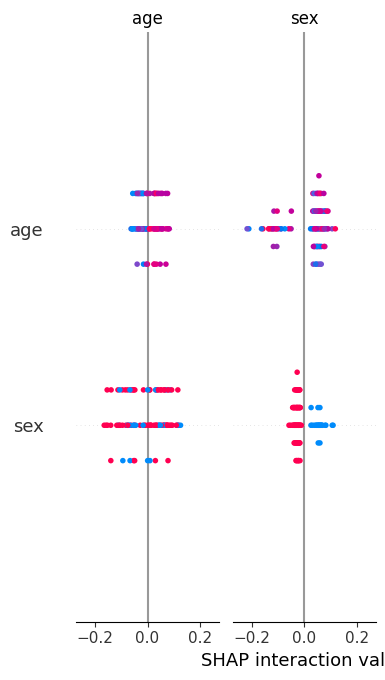

In [30]:
# Fit the model
rf_tuned.fit(X_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(X_test)

# Ensure the shap_values have the correct shape
if len(shap_values) == 2:  # For binary classification, shap_values returns a list of 2 elements
    shap_values = shap_values[1]  # Use shap_values for the positive class

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


Save the model

In [31]:
import pickle

# Save the tuned model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_tuned, model_file)


Build the app using flask

In [32]:
from flask import Flask, request, jsonify

# Initialize Flask app with a different port
app = Flask(__name__)

if __name__ == 'heartdisease-predictor':
    app.run(debug=True, port=5001)

# Initialize Flask app
app = Flask("heartdisease-predictor")

# Load the model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Define prediction route
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json(force=True)
    # Convert data into the appropriate format for prediction
    features = [list(data.values())]
    # Make prediction
    prediction = model.predict(features)
    # Return the prediction result as JSON
    return jsonify({'prediction': int(prediction[0])})

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app 'heartdisease-predictor'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/aakashvenkatraman/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/aakashvenkatraman/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/aakashvenkatraman/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aakashvenkatraman/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/Users/aakashvenkatraman/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp

SystemExit: 1

/Users/aakashvenkatraman/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
